# Clustering - K-Means

### Problem Statement
Students have to evaluate a lot of factors before taking a decision to join a university for their higher education requirements. The objective of this project is to simplify the process of applying for appropriate universities which are of similar nature.

Objective(s): Maximize the convience of admission process

Constraints: Minimize the brain drain

Success Criteria

Business Success Criteria: Reduce the application process time from anywhere between 20% to 40%

ML Success Criteria: Achieve Silhoutte coefficient of atleast 0.6

Economic Success Criteria: US Higher education department will see an increase in revenues by atleast 30%

Proposed Plan: Grouping the available universities will allow to understand the characteristics of each group.

In [1]:
# Importing required packages

In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Supress the warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Import the data
df = pd.read_excel(r"C:\Users\Swapnil Mishra\Desktop\DS\Hierarchical Clustering 360 code\University_Clustering\University_Clustering.xlsx")

In [5]:
df.head()

,UnivID,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1,Brown,RI,1310.0,89,22,13.0,22704,94.0
1,2,CalTech,CA,1415.0,100,25,6.0,63575,81.0
2,3,CMU,PA,1260.0,62,59,9.0,25026,72.0
3,4,Columbia,NY,1310.0,76,24,12.0,31510,NaN
4,5,Cornell,NY,1280.0,83,33,13.0,21864,90.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   UnivID    25 non-null     int64  
 1   Univ      25 non-null     object 
 2   State     25 non-null     object 
 3   SAT       24 non-null     float64
 4   Top10     25 non-null     int64  
 5   Accept    25 non-null     int64  
 6   SFRatio   24 non-null     float64
 7   Expenses  25 non-null     int64  
 8   GradRate  24 non-null     float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.9+ KB


In [7]:
# Exploratory Data Analysis(EDA)/Descriptive Statistics
# 1st Moment Business Decision(Measures of Central Tendency)

In [8]:
print(df.select_dtypes(include = [np.number]).mean())
print('\n')
print(df.select_dtypes(include = [np.number]).median())
print('\n')
print(df.mode())

UnivID         13.000000
SAT          1266.916667
Top10          76.480000
Accept         39.200000
SFRatio        12.708333
Expenses    27388.000000
GradRate       86.666667
dtype: float64


UnivID         13.0
SAT          1287.5
Top10          81.0
Accept         36.0
SFRatio        12.0
Expenses    27553.0
GradRate       90.0
dtype: float64


    UnivID          Univ State     SAT  Top10  Accept  SFRatio  Expenses  \
0        1         Brown    CA  1260.0   75.0    14.0     11.0      8704   
1        2           CMU    PA  1310.0   89.0    24.0     12.0      9066   
2        3       CalTech   NaN  1375.0   90.0    30.0      NaN     10185   
3        4      Columbia   NaN     NaN   91.0    44.0      NaN     11857   
4        5       Cornell   NaN     NaN   95.0     NaN      NaN     13349   
5        6     Dartmouth   NaN     NaN    NaN     NaN      NaN     15122   
6        7          Duke   NaN     NaN    NaN     NaN      NaN     15140   
7        8    Georgetown   NaN     NaN    N

In [9]:
# 2nd Moment Business Decision
# Variance,Standard Deviantion,Range

In [10]:
print(df.select_dtypes(include = [np.number]).var())
print('\n')
print(df.select_dtypes(include = [np.number]).std())

UnivID      5.416667e+01
SAT         1.224643e+04
Top10       3.776767e+02
Accept      3.891667e+02
SFRatio     1.725906e+01
Expenses    2.080773e+08
GradRate    8.553623e+01
dtype: float64


UnivID          7.359801
SAT           110.663578
Top10          19.433905
Accept         19.727308
SFRatio         4.154402
Expenses    14424.883165
GradRate        9.248580
dtype: float64


In [11]:
# 3rd Moment Business Decision
# Measure of asymmetry in the data distribution
df.select_dtypes(include = [np.number]).skew()

UnivID      0.000000
SAT        -0.948996
Top10      -1.219756
Accept      0.867538
SFRatio     1.110628
Expenses    0.852350
GradRate   -0.964565
dtype: float64

In [12]:
# 4th Moment Business Decision
# Measure of peakedness - Represents the overall spread of the data
df.select_dtypes(include = [np.number]).kurt()

UnivID     -1.200000
SAT         0.240543
Top10       0.700307
Accept      0.252908
SFRatio     2.171173
Expenses    0.638162
GradRate   -0.307285
dtype: float64

In [13]:
# Descriptive Statistics and Data Distribution Function
df.describe()

,UnivID,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,24.000000,25.000000,25.000000,24.000000,25.000000,24.000000
mean,13.000000,1266.916667,76.480000,39.200000,12.708333,27388.000000,86.666667
std,7.359801,110.663578,19.433905,19.727308,4.154402,14424.883165,9.248580
min,1.000000,1005.000000,28.000000,14.000000,6.000000,8704.000000,67.000000
25%,7.000000,1236.250000,74.000000,24.000000,10.750000,15140.000000,80.750000
50%,13.000000,1287.500000,81.000000,36.000000,12.000000,27553.000000,90.000000
75%,19.000000,1345.000000,90.000000,50.000000,14.250000,34870.000000,94.000000
max,25.000000,1415.000000,100.000000,90.000000,25.000000,63575.000000,97.000000


In [14]:
# Data Preprocessing
# Typecasting
df.dtypes

UnivID        int64
Univ         object
State        object
SAT         float64
Top10         int64
Accept        int64
SFRatio     float64
Expenses      int64
GradRate    float64
dtype: object

In [15]:
# Convert 'int64' to 'str' (string) type
df.UnivID = df.UnivID.astype('str')
df.dtypes

UnivID       object
Univ         object
State        object
SAT         float64
Top10         int64
Accept        int64
SFRatio     float64
Expenses      int64
GradRate    float64
dtype: object

In [16]:
# Cleaning Unwanted Columns
df.drop(['UnivID'],axis = 1,inplace = True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Univ      25 non-null     object 
 1   State     25 non-null     object 
 2   SAT       24 non-null     float64
 3   Top10     25 non-null     int64  
 4   Accept    25 non-null     int64  
 5   SFRatio   24 non-null     float64
 6   Expenses  25 non-null     int64  
 7   GradRate  24 non-null     float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ KB


In [18]:
# Handling Duplicates
duplicate = df.duplicated()
duplicate
sum(duplicate)

0

In [19]:
# Removing Duplicates
df = df.drop_duplicates() # Returns DataFrame with duplicate rows removed

In [20]:
# Missing Value Analysis
# Imputation
df.isnull().sum()

Univ        0
State       0
SAT         1
Top10       0
Accept      0
SFRatio     1
Expenses    0
GradRate    1
dtype: int64

In [21]:
type(df['SAT'])

pandas.core.series.Series

In [22]:
type(df[['SAT']])

pandas.core.frame.DataFrame

In [23]:
from sklearn.impute import SimpleImputer

# Mean Imputer
mean_imputer = SimpleImputer(missing_values = np.nan,strategy = 'mean')
df['SAT'] = pd.DataFrame(mean_imputer.fit_transform(df[['SAT']]))

df['SAT'].isna().sum()

0

In [24]:
# Median Imputer
meadian_imputer = SimpleImputer(missing_values = np.nan,strategy = 'median')
df['SFRatio'] = pd.DataFrame(mean_imputer.fit_transform(df[["SAT"]]))

df["SAT"].isna().sum()

0

In [25]:
# Random Imputer 
from feature_engine.imputation import RandomSampleImputer

random_imputer = RandomSampleImputer(['GradRate'])
df['GradRate'] = pd.DataFrame(random_imputer.fit_transform(df[['GradRate']]))
df["GradRate"].isna().sum()

0

In [26]:
df.isna().sum()

Univ        0
State       0
SAT         0
Top10       0
Accept      0
SFRatio     0
Expenses    0
GradRate    0
dtype: int64

In [27]:
# Single Code for Mean Imputation on the entire dataset
# df.fillna(df.mean(),inplace = True)

In [28]:
# Outliers Analysis
# For handling outliers we use 3R (Rectify,Retain,Remove) technique

In [29]:
# Dividing Categorical and Numerical Variables from Dataset
df_cate = df.iloc[:,:2]
df_cate.head()

,Univ,State
0,Brown,RI
1,CalTech,CA
2,CMU,PA
3,Columbia,NY
4,Cornell,NY


In [30]:
df_num = df.iloc[:,2:]
df_num.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310.0,89,22,1310.0,22704,94.0
1,1415.0,100,25,1415.0,63575,81.0
2,1260.0,62,59,1260.0,25026,72.0
3,1310.0,76,24,1310.0,31510,94.0
4,1280.0,83,33,1280.0,21864,90.0


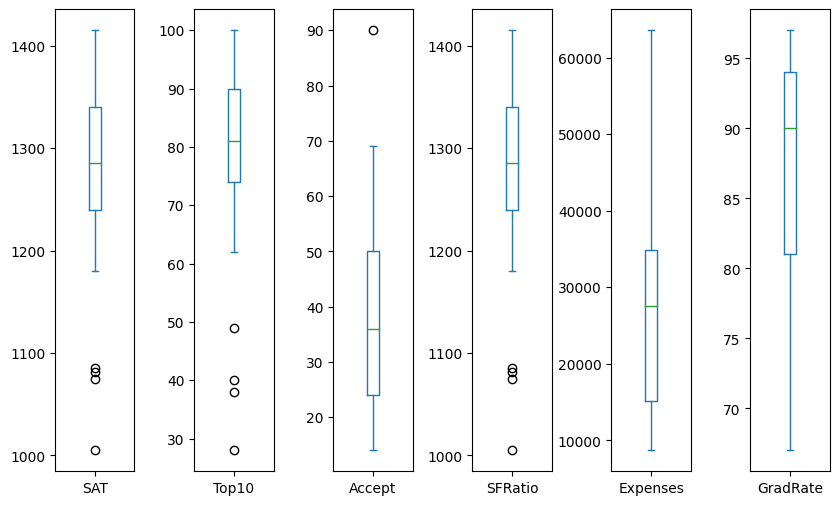

In [31]:
# Box Plot
# Columns with larger scales affect other columns
df_num.plot(kind = 'box',subplots = True,sharey = False,figsize = (10,6))
# Increasing spacing between subplots
plt.subplots_adjust(wspace = 0.75)
plt.show()

In [32]:
# The above boxplot shows outliers in SAT,Top10,Accept,SFRatio
# Outlier Analysis : WE use Winsorization Techinue to treat outliers

# Winsorization function rounds off the exceptional data points based on 
# capping method used in parameters/hyperparameters section

In [33]:
# D Tale
import dtale
d = dtale.show(df)
d.open_browser()

In [34]:
# Winsorization for "SAT","Top10","Accept","SFRatio"
winsor = Winsorizer(capping_method='iqr', # Choose IQR rule boundary
                   tail = 'both', # cap left right or both tails
                   fold = 1.5,
                   variables = ['SAT'])

df_num['SAT'] = winsor.fit_transform(df_num[['SAT']]) # Replaces outliers to cap values

In [35]:
# Winsorization for 'Top10' Column
winsor = Winsorizer(capping_method='iqr',
                   tail = 'both',
                   fold = 1.5,
                   variables = ['Top10'])
df_num['Top10'] = winsor.fit_transform(df_num[['Top10']])

In [36]:
# Winsorization for 'Accept' Column
winsor = Winsorizer(capping_method='iqr',
                   tail = 'both',
                   fold = 1.5,
                   variables = ['Accept'])

df_num['Accept'] = winsor.fit_transform(df_num[['Accept']])

In [37]:
# Winsorization for 'SFRatio' column
winsor = Winsorizer(capping_method='iqr',
                   tail = 'both',
                   fold = 1.5,
                   variables = ['SFRatio'])
df_num['SFRatio'] = winsor.fit_transform(df_num[['SFRatio']])

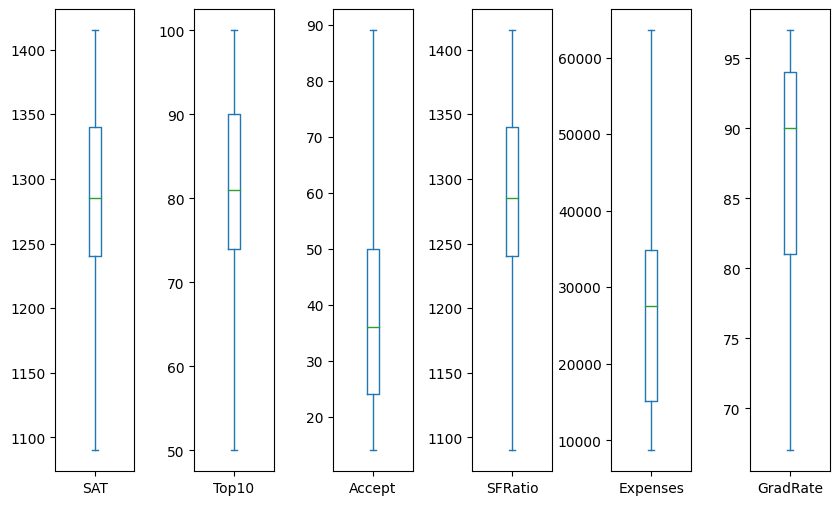

In [38]:
# Verify for outliers post the treatment
df_num.plot(kind = 'box', subplots = True,sharey = False,figsize = (10,6))
# increse the spacing between the subplots
plt.subplots_adjust(wspace = 0.75)
plt.show()

In [39]:
# Zero and Near Zero Varaince
df_num.var()

SAT         9.718958e+03
Top10       2.446267e+02
Accept      3.849733e+02
SFRatio     9.718958e+03
Expenses    2.080773e+08
GradRate    8.412333e+01
dtype: float64

In [40]:
# Dummy Variable Creation
df.dtypes

Univ         object
State        object
SAT         float64
Top10         int64
Accept        int64
SFRatio     float64
Expenses      int64
GradRate    float64
dtype: object

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Univ      25 non-null     object 
 1   State     25 non-null     object 
 2   SAT       25 non-null     float64
 3   Top10     25 non-null     int64  
 4   Accept    25 non-null     int64  
 5   SFRatio   25 non-null     float64
 6   Expenses  25 non-null     int64  
 7   GradRate  25 non-null     float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ KB


In [42]:
df_cate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Univ    25 non-null     object
 1   State   25 non-null     object
dtypes: object(2)
memory usage: 528.0+ bytes


In [43]:
print(df_cate.State.unique())
print('\n')
print(df_cate.State.value_counts())

['RI' 'CA' 'PA' 'NY' 'NH' 'NC' 'DC' 'MA' 'MD' 'IL' 'IN' 'NJ' 'TX' 'MI'
 'VA' 'WI' 'CT']


State
PA    3
CA    3
NY    2
MA    2
IL    2
IN    2
RI    1
TX    1
WI    1
VA    1
MI    1
MD    1
NJ    1
DC    1
NC    1
NH    1
CT    1
Name: count, dtype: int64


In [44]:
# Applying One-Hot Encoding with get_dummies
df_cate = pd.get_dummies(df_cate,columns = ['State'],drop_first=True)

In [45]:
df_cate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   State_CT  25 non-null     bool  
 2   State_DC  25 non-null     bool  
 3   State_IL  25 non-null     bool  
 4   State_IN  25 non-null     bool  
 5   State_MA  25 non-null     bool  
 6   State_MD  25 non-null     bool  
 7   State_MI  25 non-null     bool  
 8   State_NC  25 non-null     bool  
 9   State_NH  25 non-null     bool  
 10  State_NJ  25 non-null     bool  
 11  State_NY  25 non-null     bool  
 12  State_PA  25 non-null     bool  
 13  State_RI  25 non-null     bool  
 14  State_TX  25 non-null     bool  
 15  State_VA  25 non-null     bool  
 16  State_WI  25 non-null     bool  
dtypes: bool(16), object(1)
memory usage: 728.0+ bytes


In [46]:
# The dimension of the dataset after One-Hot Encoding
df_cate.shape

(25, 17)

In [47]:
df_cate.head()

,Univ,State_CT,State_DC,State_IL,State_IN,State_MA,State_MD,State_MI,State_NC,State_NH,State_NJ,State_NY,State_PA,State_RI,State_TX,State_VA,State_WI
0,Brown,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,CalTech,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,CMU,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,Columbia,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,Cornell,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


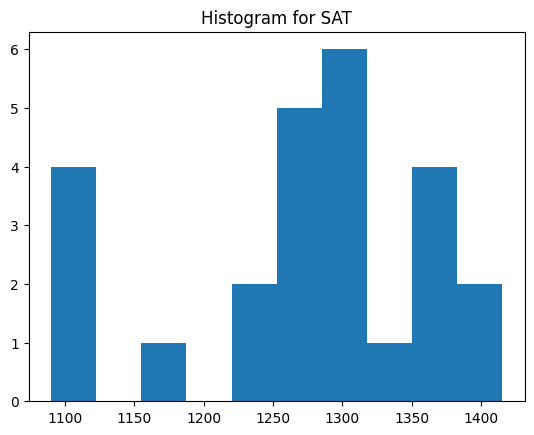

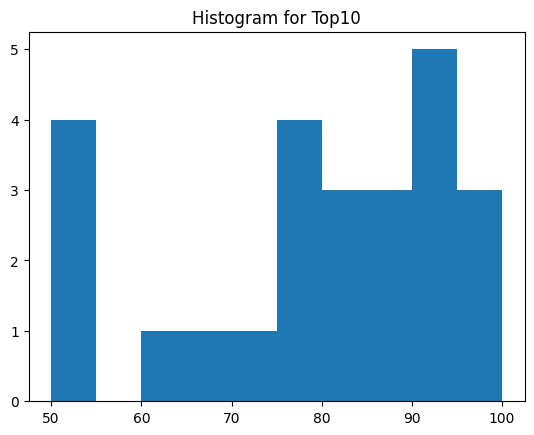

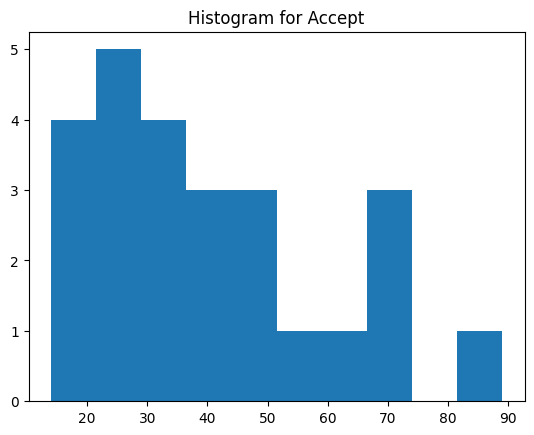

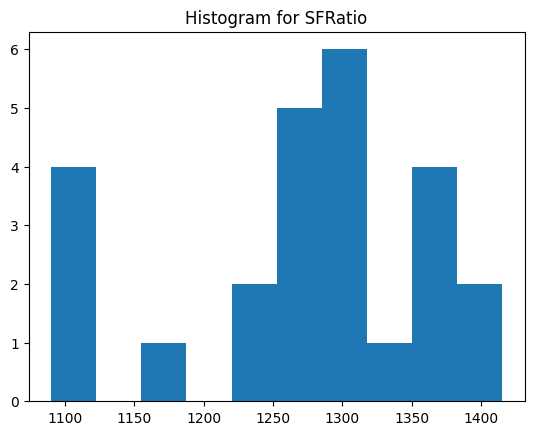

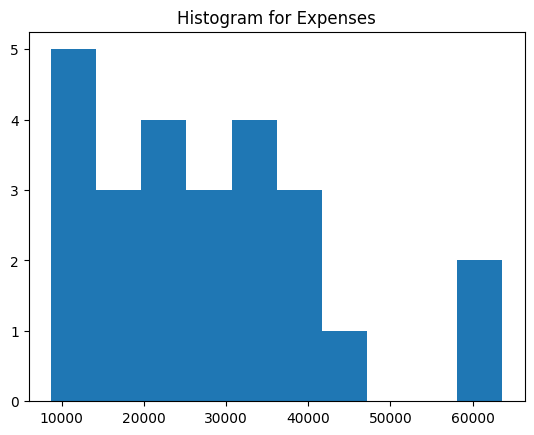

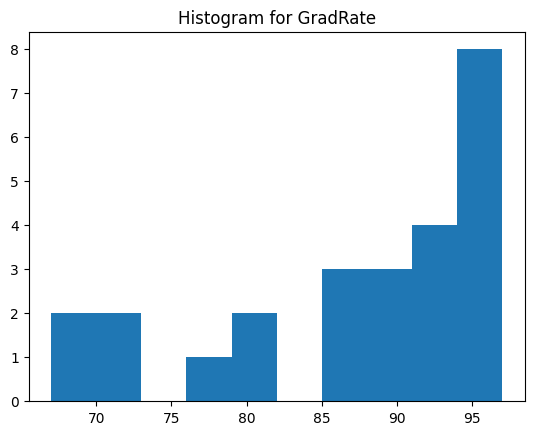

In [48]:
# Graphical Representation
# Histogram describes the spread of data

for i in df_num.columns:
    plt.hist(x = df_num[i])
    plt.title('Histogram for ' + str(i))
    plt.show()

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([1090.        , 1090.        , 1090.        , 1090.        ,
         1180.        , 1225.        , 1240.        , 1255.        ,
         1260.        , 1260.        , 1266.91666667, 1280.        ,
         1285.        , 1290.        , 1305.        , 1310.        ,
         1310.        , 1315.        , 1340.        , 1360.        ,
         1375.        , 1375.        , 1380.        , 1400.        ,
         1415.        ])),
 (98.76659036154764, 1271.4766666666667, 0.9585447047103507))

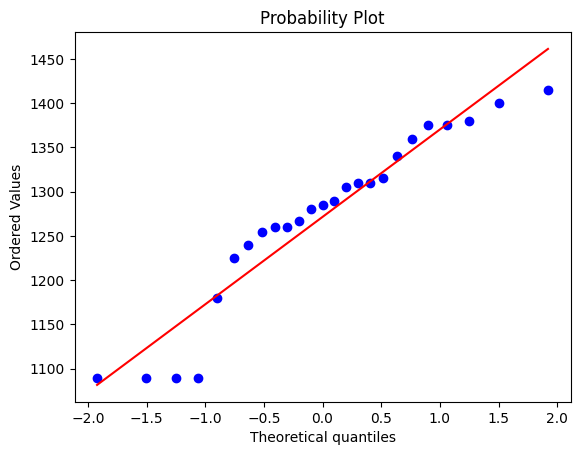

In [49]:
# Quantile -Quantile plot (helps to understand the distribution od data normal or not)
import scipy.stats as stats 
import pylab

# Checking whether data is normally distributed
stats.probplot(df_num.SAT , dist = 'norm' , plot = pylab)

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([ 50,  50,  50,  50,  62,  65,  74,  75,  75,  76,  77,  80,  81,
          83,  85,  89,  89,  90,  90,  91,  91,  94,  95,  95, 100],
        dtype=int64)),
 (15.548174662321602, 78.28, 0.9511295549439862))

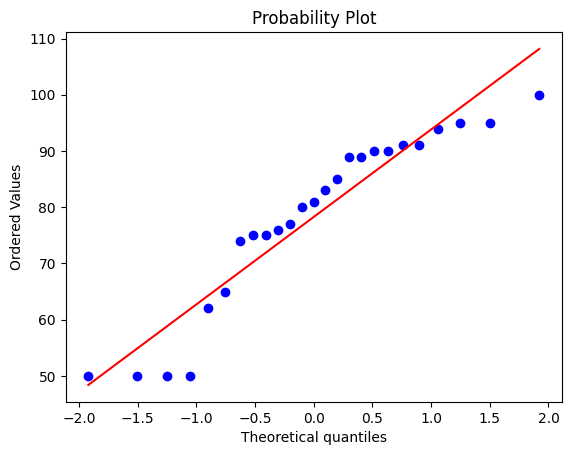

In [50]:
# Checking whether data is normally distributed
stats.probplot(df_num.Top10 , dist = 'norm' , plot = pylab)

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([14, 14, 19, 20, 22, 23, 24, 24, 25, 30, 30, 33, 36, 39, 40, 42, 44,
         44, 50, 54, 59, 67, 68, 69, 89], dtype=int64)),
 (19.806179416701234, 39.16, 0.9658230149511989))

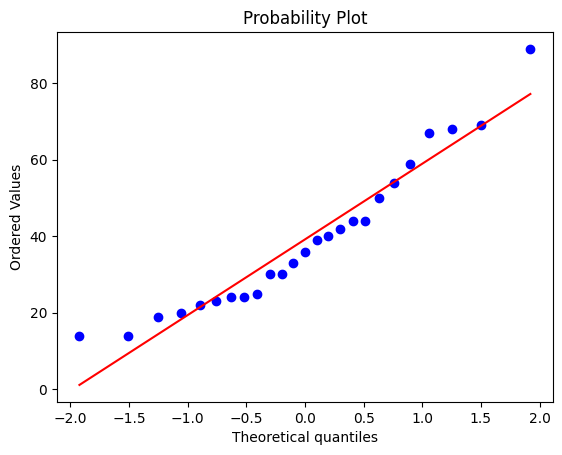

In [51]:
# Checking whether data is normally distributed
stats.probplot(df_num.Accept , dist = 'norm', plot = pylab)

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([1090.        , 1090.        , 1090.        , 1090.        ,
         1180.        , 1225.        , 1240.        , 1255.        ,
         1260.        , 1260.        , 1266.91666667, 1280.        ,
         1285.        , 1290.        , 1305.        , 1310.        ,
         1310.        , 1315.        , 1340.        , 1360.        ,
         1375.        , 1375.        , 1380.        , 1400.        ,
         1415.        ])),
 (98.76659036154764, 1271.4766666666667, 0.9585447047103507))

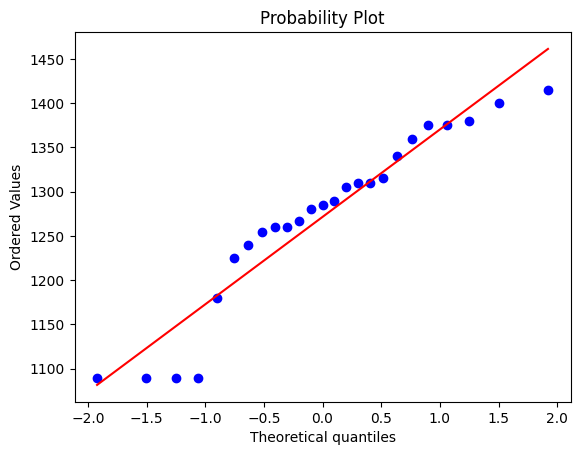

In [52]:
# Checking whether data is normally distributed
stats.probplot(df_num.SFRatio , dist = 'norm',plot = pylab)

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([ 8704,  9066, 10185, 11857, 13349, 15122, 15140, 15470, 20126,
         21864, 22704, 25026, 27553, 28052, 30220, 31510, 31585, 32162,
         34870, 36450, 38380, 39525, 43514, 58691, 63575], dtype=int64)),
 (14567.431669324984, 27387.999999999996, 0.96623519023699))

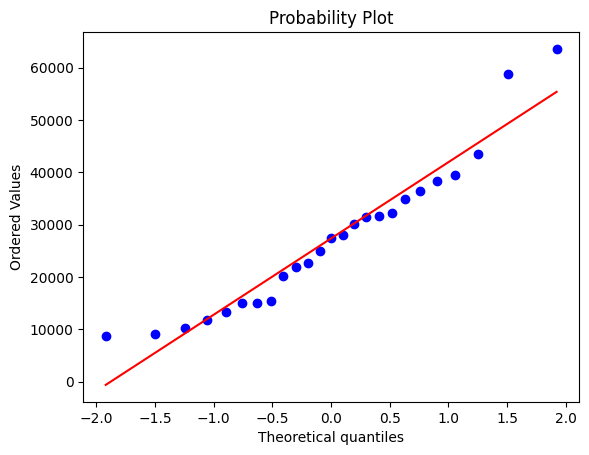

In [53]:
# Checking Whether data is normally distributed
stats.probplot(df_num.Expenses, dist = "norm", plot = pylab)

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([67., 69., 71., 72., 78., 80., 81., 85., 87., 87., 89., 90., 90.,
         91., 92., 92., 93., 94., 94., 94., 95., 95., 95., 96., 97.])),
 (8.918362994119335, 86.96, 0.9303343867415096))

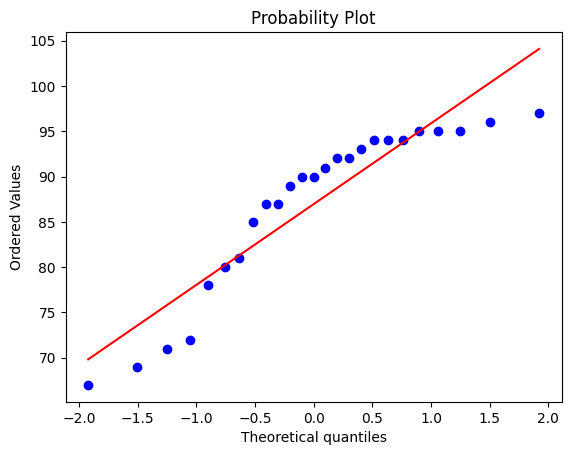

In [54]:
# Checking Whether data is normally distributed
stats.probplot(df_num.GradRate, dist = "norm", plot = pylab)

In [55]:
# Concatenate the Entire Data
df1 = pd.concat([df_cate,df_num],axis = 1) # Preprocessed data for clustering
df1.head()

,Univ,State_CT,State_DC,State_IL,State_IN,State_MA,State_MD,State_MI,State_NC,State_NH,...,State_RI,State_TX,State_VA,State_WI,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,False,False,False,False,False,False,False,False,False,...,True,False,False,False,1310.0,89,22,1310.0,22704,94.0
1,CalTech,False,False,False,False,False,False,False,False,False,...,False,False,False,False,1415.0,100,25,1415.0,63575,81.0
2,CMU,False,False,False,False,False,False,False,False,False,...,False,False,False,False,1260.0,62,59,1260.0,25026,72.0
3,Columbia,False,False,False,False,False,False,False,False,False,...,False,False,False,False,1310.0,76,24,1310.0,31510,94.0
4,Cornell,False,False,False,False,False,False,False,False,False,...,False,False,False,False,1280.0,83,33,1280.0,21864,90.0


In [56]:
df1.shape

(25, 23)

In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Univ      25 non-null     object 
 1   State_CT  25 non-null     bool   
 2   State_DC  25 non-null     bool   
 3   State_IL  25 non-null     bool   
 4   State_IN  25 non-null     bool   
 5   State_MA  25 non-null     bool   
 6   State_MD  25 non-null     bool   
 7   State_MI  25 non-null     bool   
 8   State_NC  25 non-null     bool   
 9   State_NH  25 non-null     bool   
 10  State_NJ  25 non-null     bool   
 11  State_NY  25 non-null     bool   
 12  State_PA  25 non-null     bool   
 13  State_RI  25 non-null     bool   
 14  State_TX  25 non-null     bool   
 15  State_VA  25 non-null     bool   
 16  State_WI  25 non-null     bool   
 17  SAT       25 non-null     float64
 18  Top10     25 non-null     int64  
 19  Accept    25 non-null     int64  
 20  SFRatio   25 non-null     float64


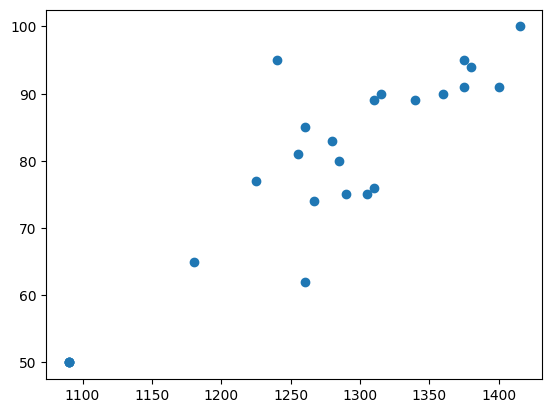

In [58]:
# Bivariate Analysis
# Scatter Plot
plt.scatter(x= df1['SAT'],y = df1['Top10'])

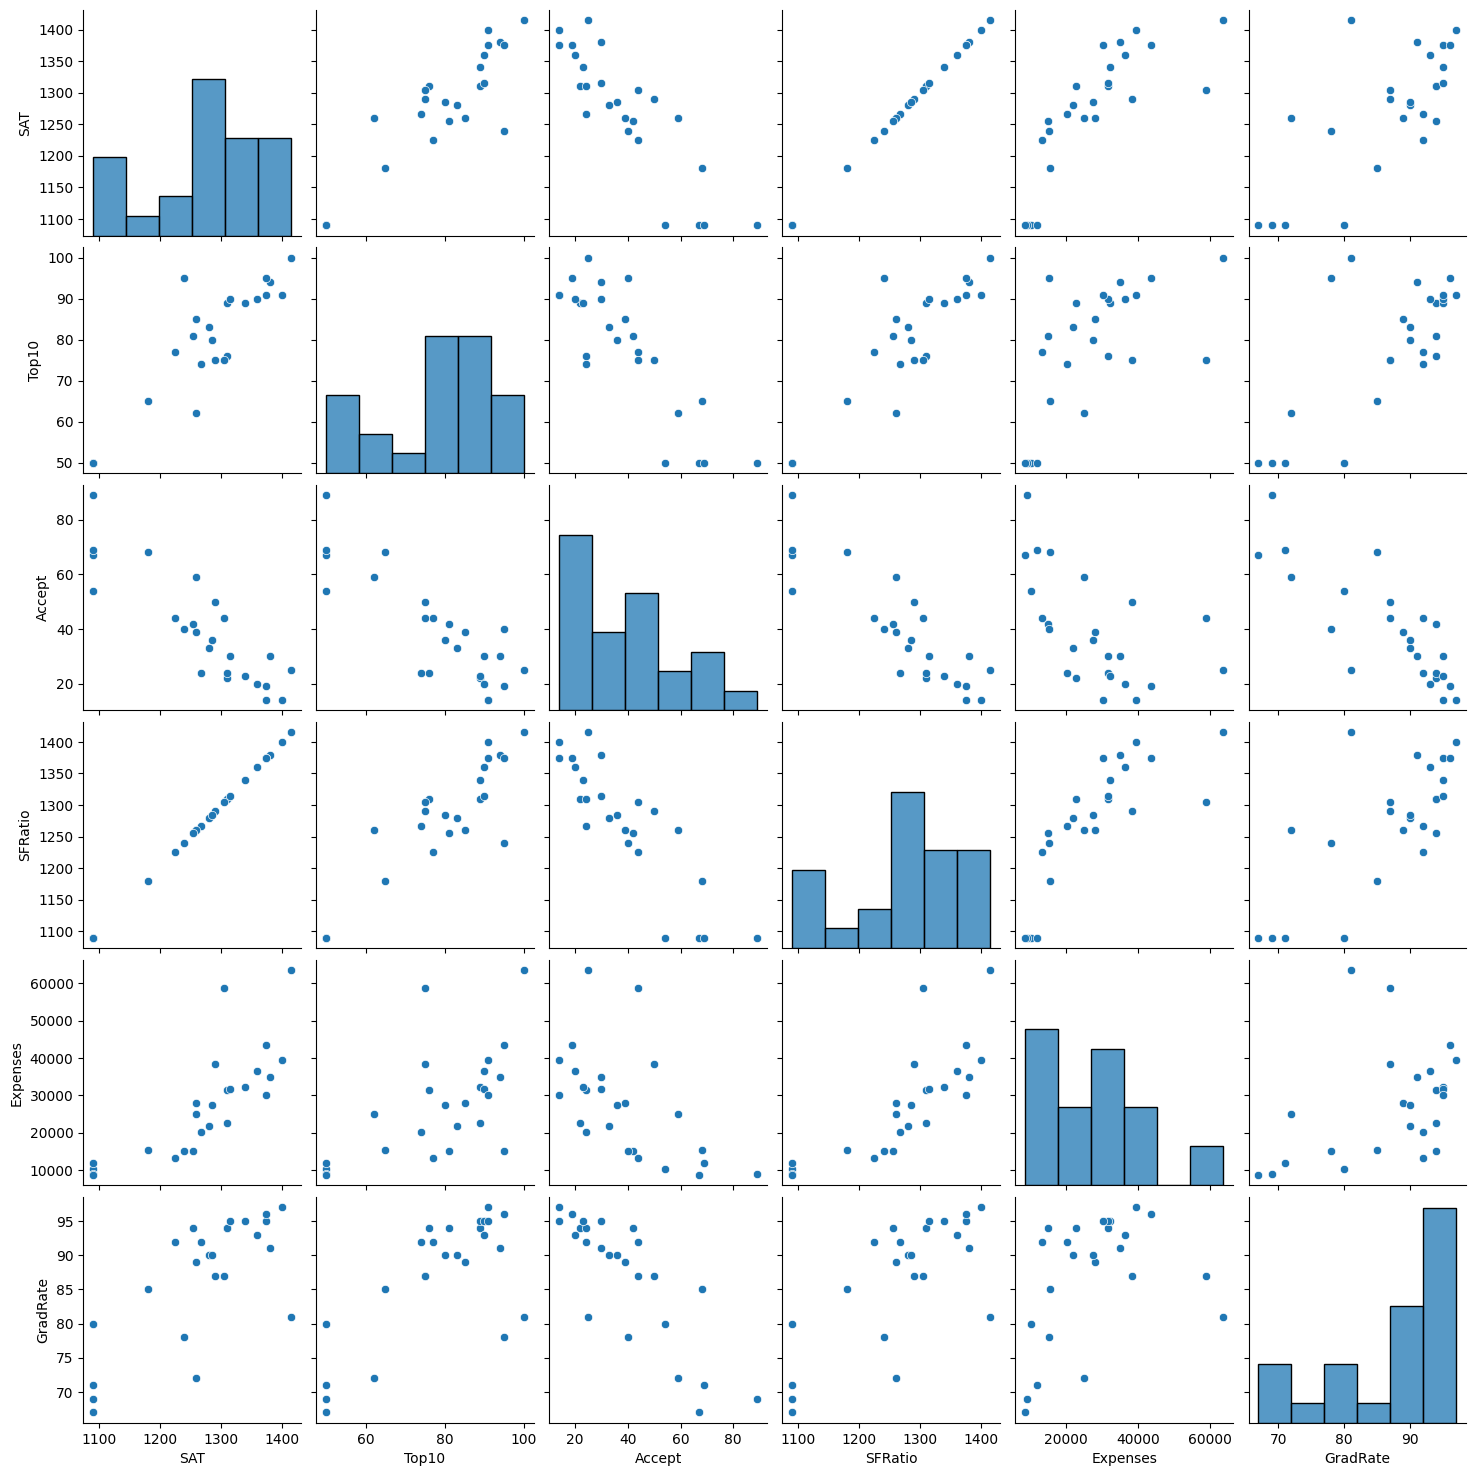

In [59]:
sns.pairplot(df_num) # Use numerical variables to scatter plots

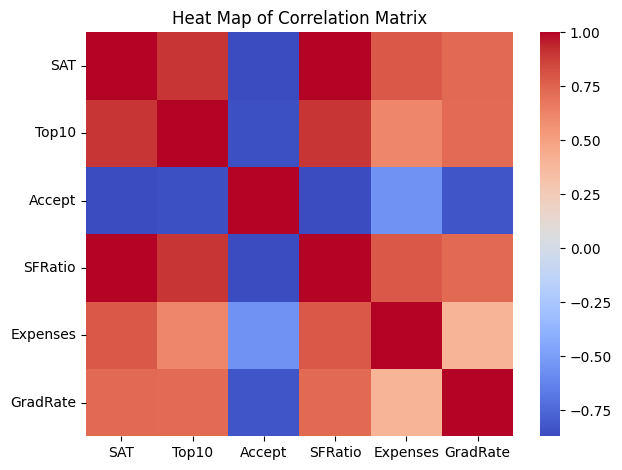

In [60]:
# Heatmap
corrmatrix = df_num.corr(method = 'pearson')
sns.heatmap(corrmatrix,xticklabels = corrmatrix.columns,yticklabels = corrmatrix.columns,cmap = 'coolwarm')
plt.title('Heat Map of Correlation Matrix')
plt.tight_layout()
plt.show()

In [61]:
# Scaling Using Normalization
def norm_func(i):
    x = (i - i.min()) / (i.max() - i.min())
    return(x)

In [62]:
num_df = df1.select_dtypes(include = ['number','bool'])
# Convert boolean columns to integers
num_df = num_df.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)
df_norm = norm_func(num_df)

In [63]:
df_norm.describe()

,State_CT,State_DC,State_IL,State_IN,State_MA,State_MD,State_MI,State_NC,State_NH,State_NJ,...,State_RI,State_TX,State_VA,State_WI,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.00,25.00,25.000000,25.000000,25.000000,25.00,25.00,25.00,25.00,25.00,...,25.00,25.00,25.00,25.00,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.04,0.04,0.080000,0.080000,0.080000,0.04,0.04,0.04,0.04,0.04,...,0.04,0.04,0.04,0.04,0.558390,0.565600,0.335467,0.558390,0.340508,0.665333
std,0.20,0.20,0.276887,0.276887,0.276887,0.20,0.20,0.20,0.20,0.20,...,0.20,0.20,0.20,0.20,0.303338,0.312811,0.261610,0.303338,0.262887,0.305729
min,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.461538,0.480000,0.133333,0.461538,0.117293,0.466667
50%,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.600000,0.620000,0.293333,0.600000,0.343515,0.766667
75%,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.769231,0.800000,0.480000,0.769231,0.476864,0.900000
max,1.00,1.00,1.000000,1.000000,1.000000,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
# Clustering Model Building
# K Means Clustering
# Libraries for creating scree plot or elbow curve
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [65]:
# Scree plot ot Elbow curve
TWSS = []
k = list(range(2,9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)
    
TWSS

[24.051780602327277,
 21.52992807182941,
 19.70004890480593,
 20.971623605963085,
 15.372779151469775,
 15.526160024641888,
 12.49976201777758]

Text(0, 0.5, 'total within sum of squares')

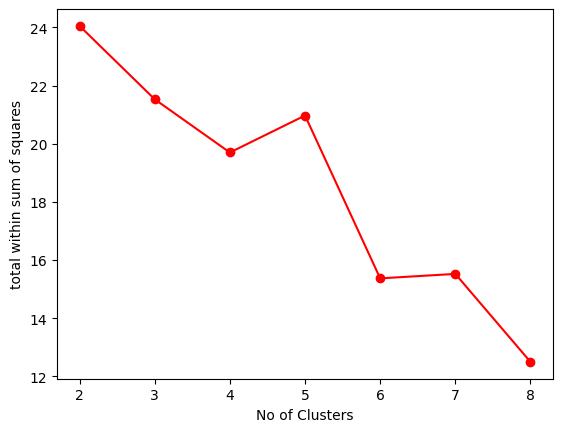

In [66]:
# Creating a scree plot to find out No of Clusters
plt.plot(k,TWSS,'ro-')
plt.xlabel('No of Clusters')
plt.ylabel('total within sum of squares')

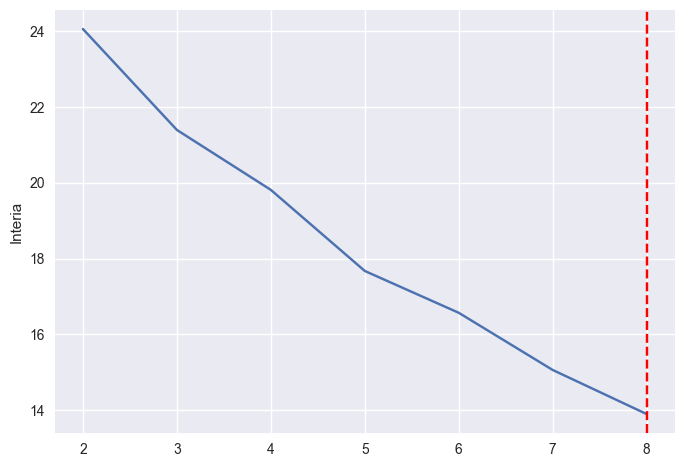

In [67]:
# Using KneeLocator
List = []

for k in range(2,9):
    kmeans = KMeans(n_clusters = k , init = 'random',max_iter = 30,random_state = 1,n_init = 10)
    kmeans.fit(df_norm)
    List.append(kmeans.inertia_)
    
from kneed import KneeLocator
kl = KneeLocator(range(2, 9), List, curve = 'convex') 
# The line is pretty linear hence Kneelocator is not able to detect the knee/elbow appropriately
kl.elbow
plt.style.use("seaborn")
plt.plot(range(2, 9), List)
plt.xticks(range(2, 9))
plt.ylabel("Interia")
plt.axvline(x = kl.elbow, color = 'r', label = 'axvline - full height', ls = '--')
plt.show()

In [68]:
# Detecting the best k = 4 using TWSS Value from scree plot
model = KMeans(n_clusters= 4)
yy = model.fit(df_norm)

In [69]:
# We can see labels of clusters

model.labels_

array([0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 1, 0, 1, 0, 3, 2, 2,
       0, 1, 0])

In [70]:
mb = pd.Series(model.labels_)

In [71]:
df['clust'] = mb

In [72]:
df.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
0,Brown,RI,1310.0,89,22,1310.0,22704,94.0,0
1,CalTech,CA,1415.0,100,25,1415.0,63575,81.0,0
2,CMU,PA,1260.0,62,59,1260.0,25026,72.0,2
3,Columbia,NY,1310.0,76,24,1310.0,31510,94.0,0
4,Cornell,NY,1280.0,83,33,1280.0,21864,90.0,0


In [73]:
x = df.iloc[:,3:].values

In [74]:
# 3 D Scatter Plot

<IPython.core.display.Javascript object>


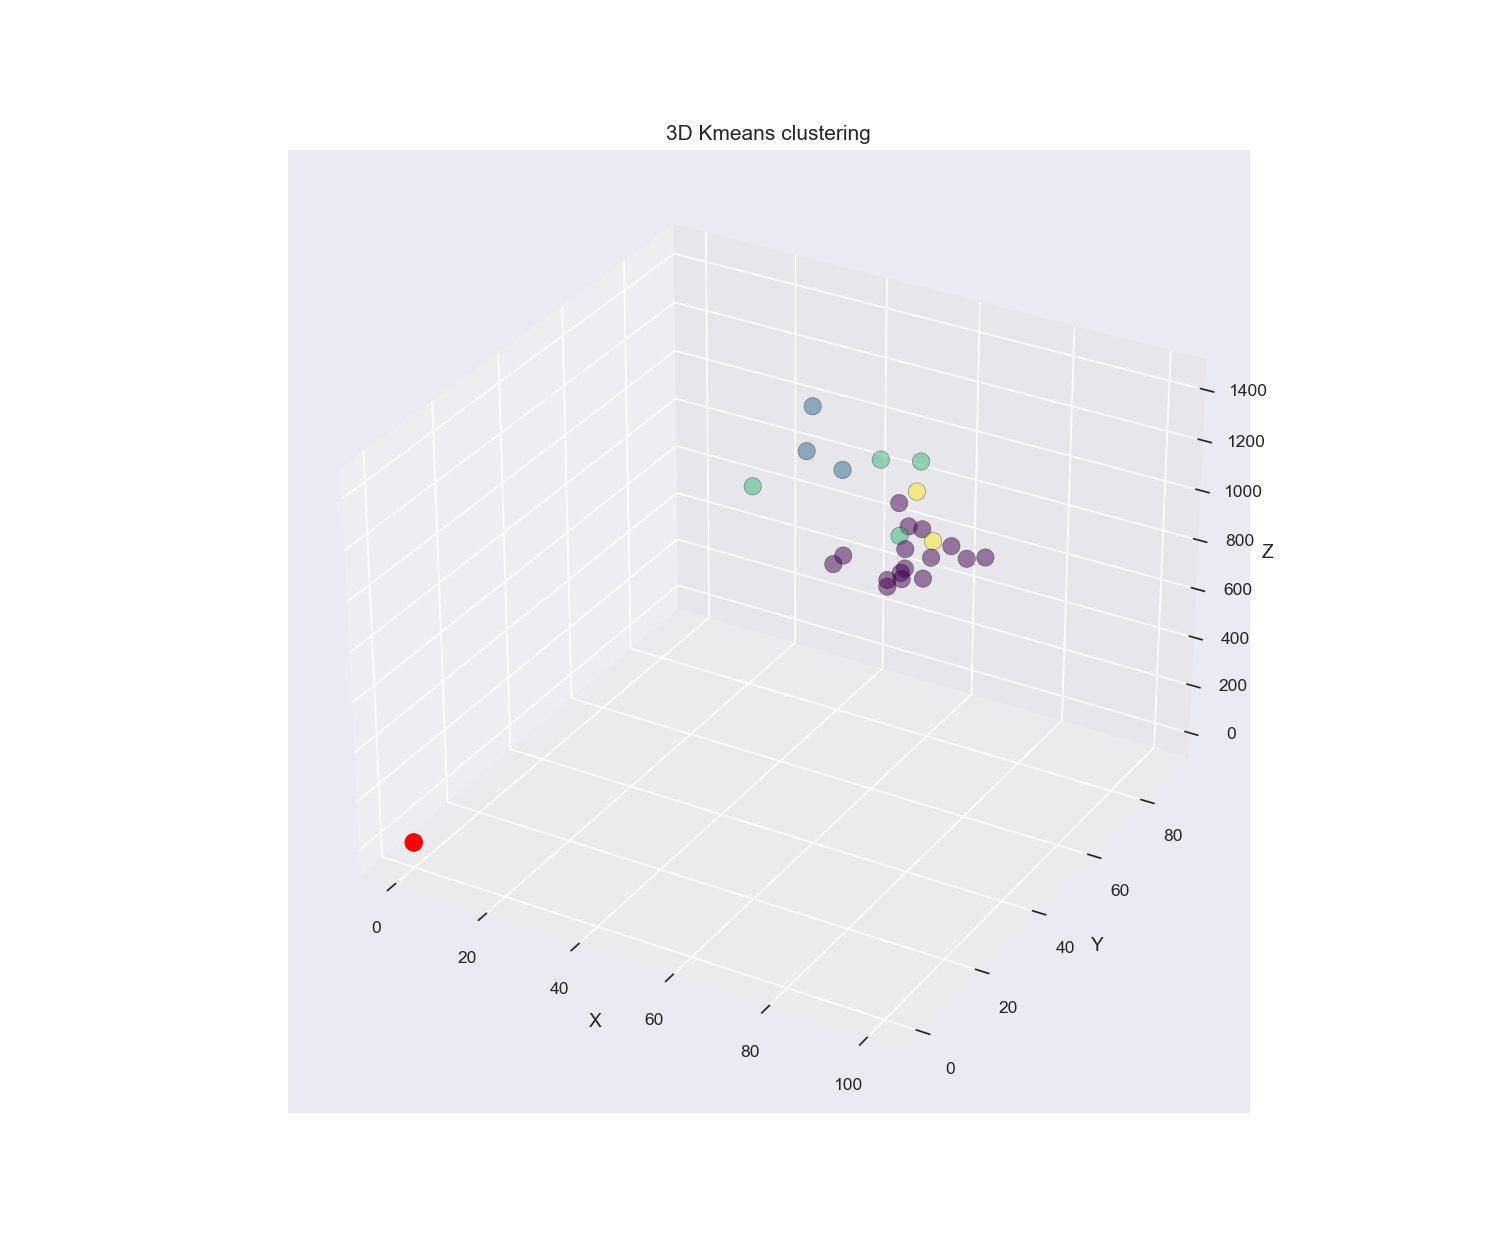

In [75]:
# Cluster according to any three Attributes
# Plot clusters and centroids
%matplotlib notebook
fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(111, projection = '3d')
#syntax
##ax.scatter(x , y , z , c = , cmap = , marker = , edgecolor = , s = , alpha)
ax.scatter(x[:,0], x[:,1], x[:,2], c=model.labels_, cmap='viridis', marker='o', edgecolor='k', s = 100, alpha = 0.5)
ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], model.cluster_centers_[:,2], s = 100, c = 'r', marker='o', label = 'Centroid')
ax.set_title("3D Kmeans clustering")
ax.set_xlabel("X")
ax.set_ylabel("Y")   
ax.set_zlabel("Z")
plt.show()

In [76]:
# Cluster Evaluation
# Silhouette Coefficient
# 1 denotes best and 0 denotes overlapping clusters
from sklearn import metrics
metrics.silhouette_score(df_norm,model.labels_)

0.13644317090558145

In [77]:
# Calinski Harabasz:
# Higher value of CH index means cluster are well separated.
# There is no acceptable ot cut-off value defined.

metrics.calinski_harabasz_score(df_norm, model.labels_)

4.67270931171494

In [78]:
# Davies-Bouldin Index:
# Unlike the previous two metrics, this score measures the similarity of 
# clusters. 
# The lower the score the better separation there is between your clusters.

metrics.davies_bouldin_score(df_norm, model.labels_)

1.2905284607248495

In [79]:
# Evaluation of Number of Clusters using Silhouette Coefficient Technique

from sklearn.metrics import silhouette_score

silhouette_coefficients = []

for k in range (2, 11):
    kmeans = KMeans(n_clusters = k, init = "random", random_state = 1)
    kmeans.fit(df_norm)
    score = silhouette_score(df_norm, kmeans.labels_)
    k = k
    Sil_coff = score
    silhouette_coefficients.append([k, Sil_coff])

In [80]:
silhouette_coefficients

[[2, 0.25233487570956253],
 [3, 0.10887111821919623],
 [4, 0.12256103133126031],
 [5, 0.13527702797880276],
 [6, 0.11469379097735992],
 [7, 0.12083508260317824],
 [8, 0.10916728503792625],
 [9, 0.14476840363332205],
 [10, 0.13917421205346492]]

### Shilhouette Coeffficients shows, the number of clusters k = 2 as the best value

For n_clusters = 2, the average silhouette_score is: 0.25233487570956253


<IPython.core.display.Javascript object>


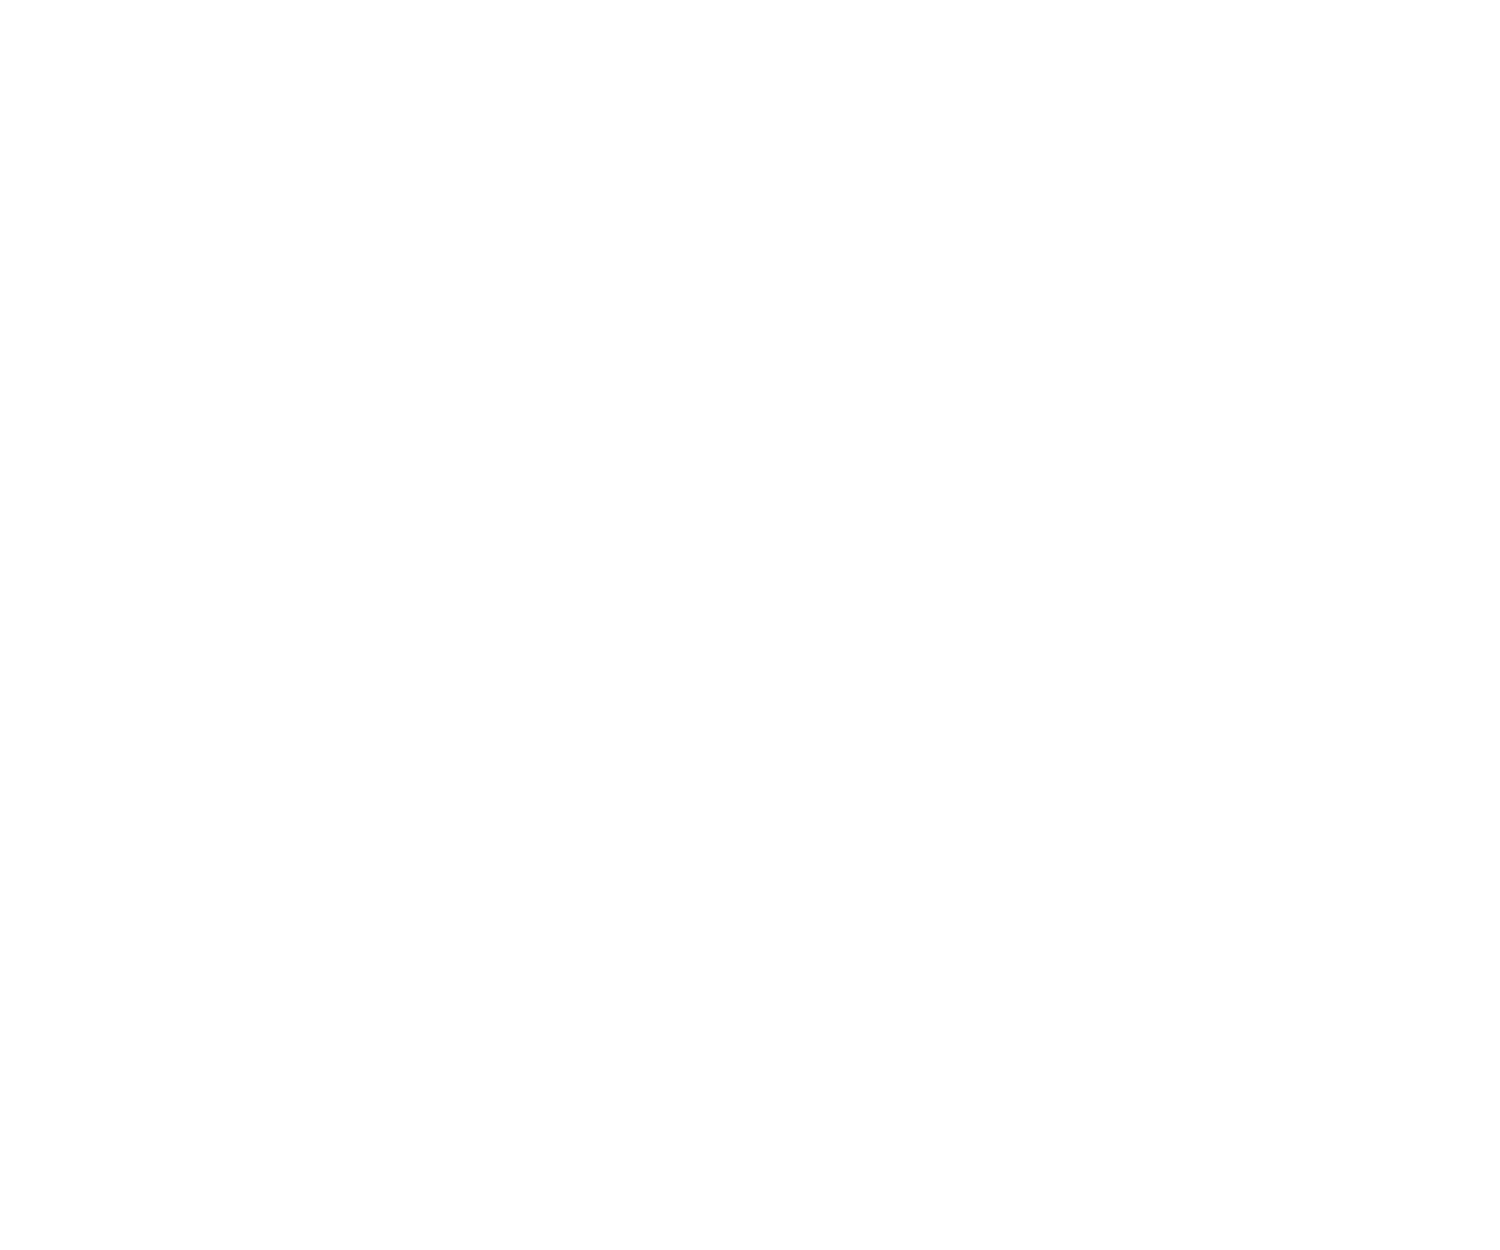

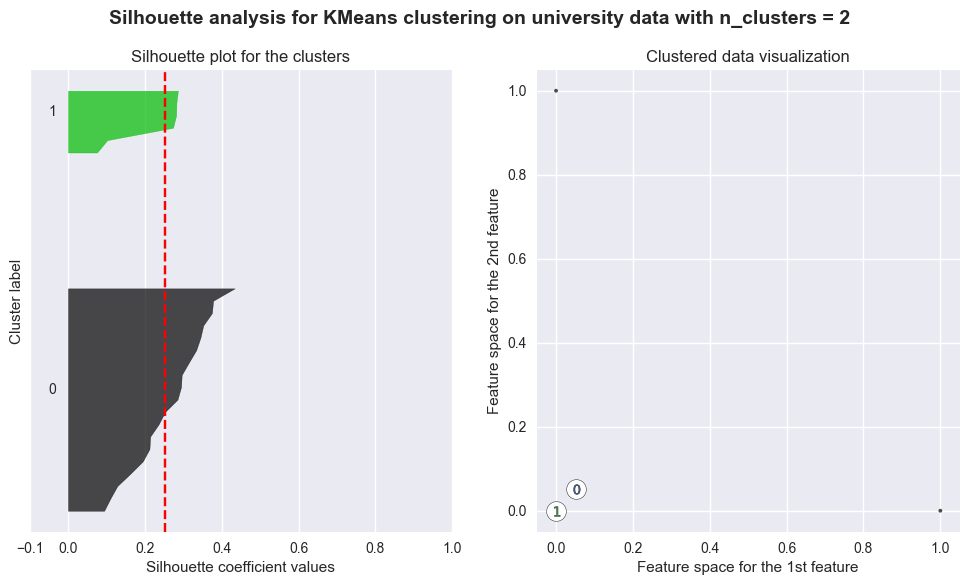

For n_clusters = 3, the average silhouette_score is: 0.12692558392702716


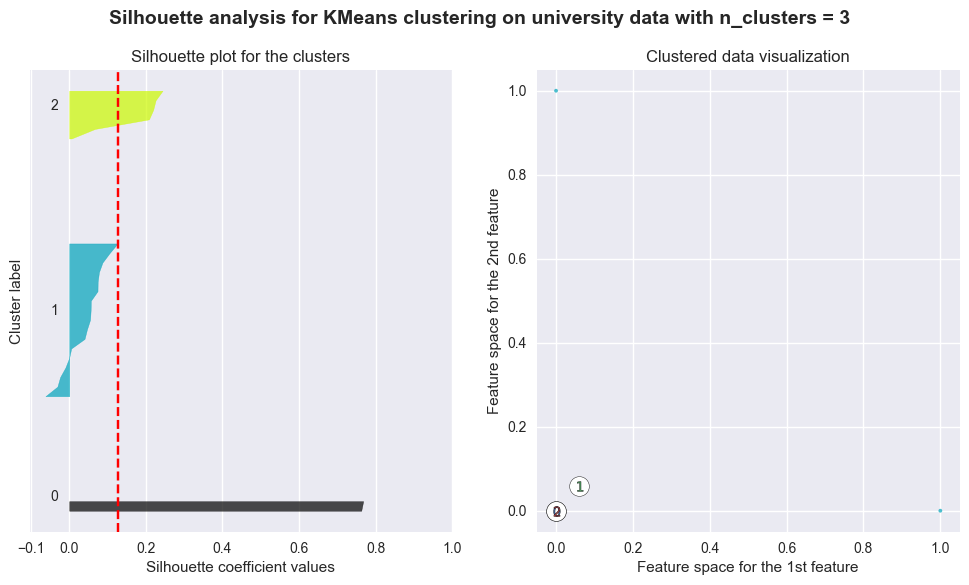

For n_clusters = 4, the average silhouette_score is: 0.14877159293664893


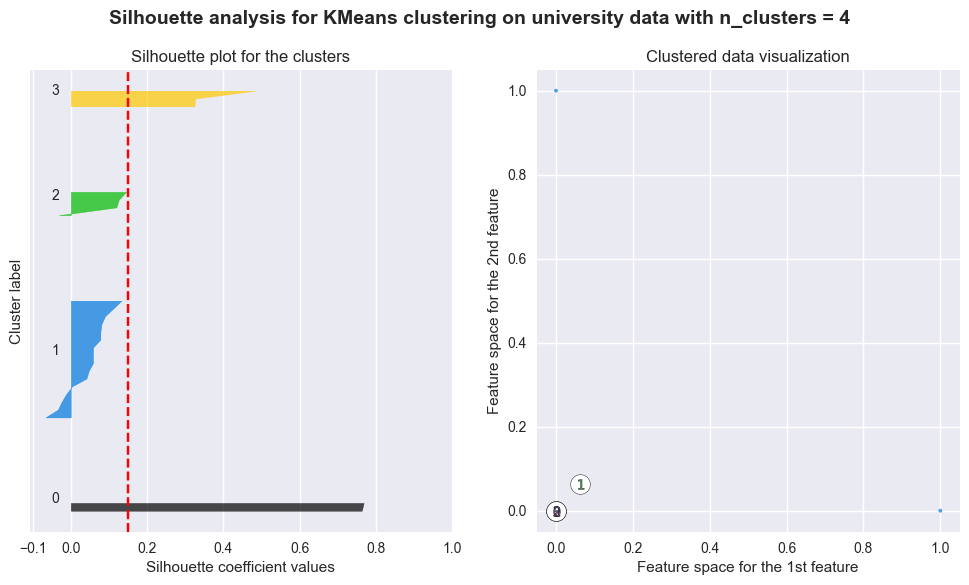

For n_clusters = 5, the average silhouette_score is: 0.1389918261006569


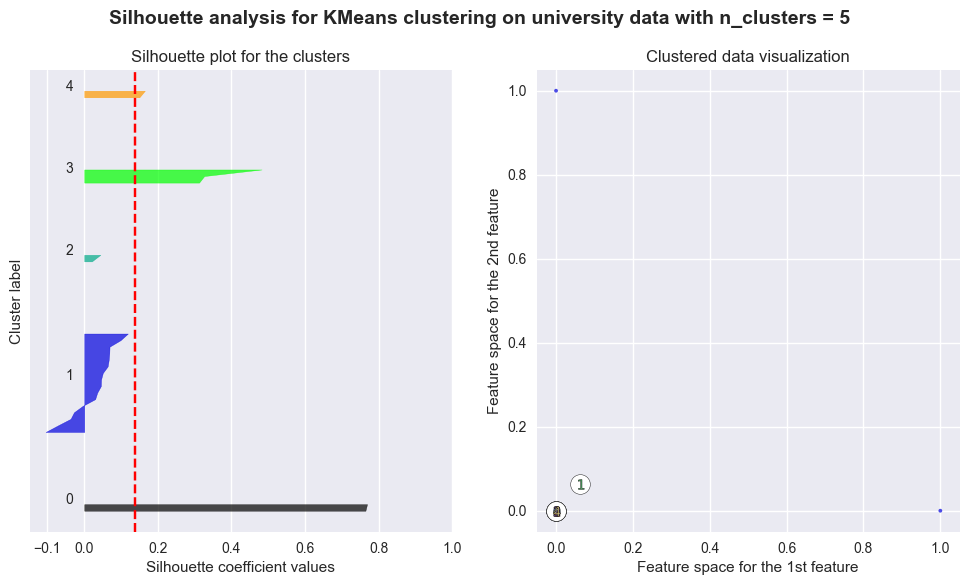

For n_clusters = 6, the average silhouette_score is: 0.17517973544554039


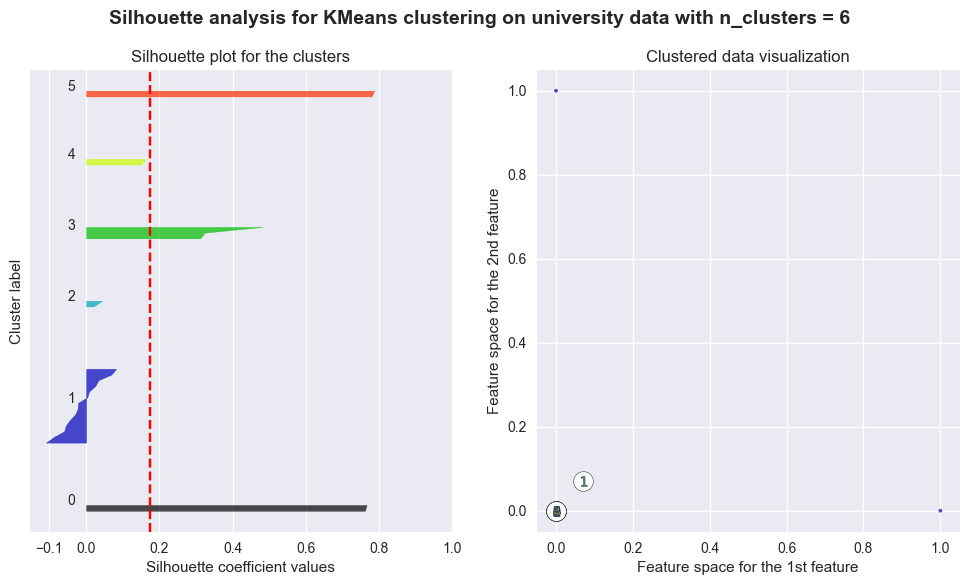

In [81]:
# For Jupyter Notebooks
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Define range of clusters to test
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 6)  # Adjust the figure size

    # Initialize the clusterer with n_clusters value and a random generator
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_norm)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(df_norm, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_norm, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette plot for the clusters")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_norm.iloc[:, 0], df_norm.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Clustered data visualization")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(f"Silhouette analysis for KMeans clustering on university data with n_clusters = {n_clusters}",
                 fontsize=14, fontweight='bold')

    plt.show()
